<a href="https://colab.research.google.com/github/chessmanx/Demo-web/blob/main/cnn_mosquito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN-Image classification

In [ ]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt


In [ ]:
!wget http://techno.varee.ac.th/colab/mosquito.zip
!unzip --qq mosquito.zip

--2022-06-14 06:17:48--  http://techno.varee.ac.th/colab/mosquito.zip
Resolving techno.varee.ac.th (techno.varee.ac.th)... 110.164.57.36
Connecting to techno.varee.ac.th (techno.varee.ac.th)|110.164.57.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28715057 (27M) [application/zip]
Saving to: ‘mosquito.zip’

mosquito.zip        100%[===================>]  27.38M   485KB/s    in 30s     

2022-06-14 06:18:18 (949 KB/s) - ‘mosquito.zip’ saved [28715057/28715057]



(<matplotlib.axes._subplots.AxesSubplot at 0x7fc87bc49cd0>,
 <matplotlib.image.AxesImage at 0x7fc8f192a710>)

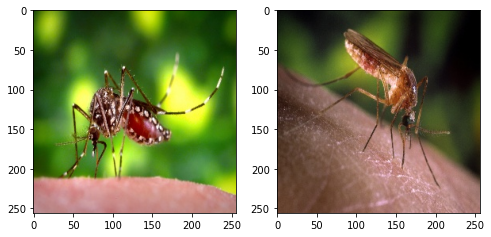

In [ ]:
img1 = cv2.imread('/content/train/Aedes/Aedes1.jpg')
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)

img2 = cv2.imread('/content/train/Culex/Culex1.jpg')
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(img2)

In [ ]:
width = 128
num_classes = 2
trainpath = 'train/'
testpath = 'test/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]

In [ ]:
trainImg , testImg

(['train/Culex', 'train/Aedes'], ['test/Culex', 'test/Aedes'])

In [ ]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)

            l = imagePath.split('/')[1]

            if l == 'Aedes':
              labels.append([1,0])
            elif l == 'Culex':
              labels.append([0,1])



  return rawImgs, labels

In [ ]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 30/30 [00:00<00:00, 434.06it/s]


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((1200, 128, 128, 3), (1200, 2), (60, 128, 128, 3), (60, 2))

In [ ]:
model0 = Sequential([
        Conv2D(128, (3,3), activation='relu', input_shape=(width, width, 3)),
        MaxPool2D(2),
        Conv2D(128,(3,3) , activation='relu'),
        MaxPool2D(pool_size=(2,2 )),
        Dense(16),
        Flatten(),

        Dense(num_classes, activation='softmax') #softmax for one hot . . # sigmoid for 0/1
    ])

In [ ]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 30, 30, 16)        2064      
                                                                 
 flatten (Flatten)           (None, 14400)             0

In [ ]:
model0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
batch_size = 32
epochs = 10

In [ ]:
history = model0.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
38/38 [==============================] - 14s 65ms/step - loss: 0.5708 - accuracy: 0.7092 - val_loss: 0.3319 - val_accuracy: 0.8500
Epoch 2/10
38/38 [==============================] - 2s 45ms/step - loss: 0.1744 - accuracy: 0.9358 - val_loss: 0.1676 - val_accuracy: 0.9333
Epoch 3/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0720 - accuracy: 0.9800 - val_loss: 0.8274 - val_accuracy: 0.8333
Epoch 4/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0559 - accuracy: 0.9817 - val_loss: 0.1819 - val_accuracy: 0.9667
Epoch 5/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0394 - accuracy: 0.9867 - val_loss: 0.1814 - val_accuracy: 0.9833
Epoch 6/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0418 - accuracy: 0.9825 - val_loss: 0.3277 - val_accuracy: 0.9500
Epoch 7/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0316 - accuracy: 0.9892 - val_loss: 0.2946 - val_accuracy: 0.9500
Epoch 8/10
3

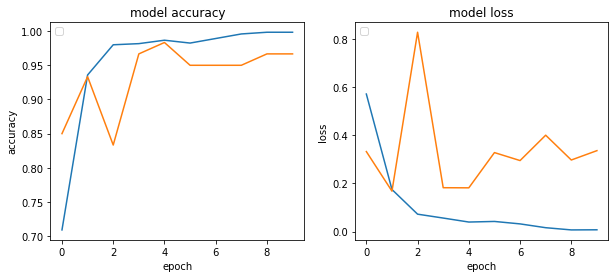

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121),
plt.title('model accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['accuracy']);plt.plot(history.history['val_accuracy'])

plt.subplot(122)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['loss']);plt.plot(history.history['val_loss'])


In [ ]:
testpath = 'test/'
testImg = [testpath+f for f in listdir(testpath)]
for imagePath in (testImg):
    for i,item in enumerate(listdir(imagePath)):
        file = join(imagePath, item)
        print(file)

In [ ]:
testpath = 'test/'
testImg = [testpath+f for f in listdir(testpath)]
rimg = []
for imagePath in (testImg):
    for i,item in enumerate(listdir(imagePath)):

        file = join(imagePath, item)
        if file[-1] =='g':
          print(file)
          imgori = cv2.imread(file)
          imgori = cv2.cvtColor(imgori , cv2.COLOR_BGR2RGB)
          img = cv2.resize(imgori ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = model0.predict(rimg)
          label = ['Aedes','Culex']
          result = label[np.argmax(predict)]
          plt.title(imagePath)
          cv2.putText(imgori, str(result), (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2 )

          plt.imshow(imgori)
          plt.show()


In [ ]:
model0.save("model.h5")



---



---



Transfer learning with MobilenetV2

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),
                                                   include_top=False,
                                                   weights='imagenet')
base_model.trainable = False
num_classes = 2

model = Sequential([
        base_model,

        Conv2D(128, 3, activation='relu'),
        Dense(16),
        Flatten(),
        Dense(num_classes, activation='softmax')
    ])


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 128)         1474688   
                                                                 
 dense_14 (Dense)            (None, 2, 2, 16)          2064      
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 2)                 130       
                                                                 
Total params: 3,734,866
Trainable params: 1,476,882
Non-trainable params: 2,257,984
____________________________________

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
batch_size = 32
epochs = 10

In [ ]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))


Epoch 1/10
38/38 [==============================] - 7s 92ms/step - loss: 1.2788 - accuracy: 0.8958 - val_loss: 0.0375 - val_accuracy: 0.9833
Epoch 2/10
38/38 [==============================] - 2s 42ms/step - loss: 6.8699e-04 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 2s 42ms/step - loss: 1.0135e-04 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 2s 42ms/step - loss: 5.5284e-05 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 2s 42ms/step - loss: 4.3062e-05 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 2s 42ms/step - loss: 3.6442e-05 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 2s 42ms/step - loss: 3.1661e-05 - accuracy: 1.0000 - val_loss: 0.0077 - val_accura

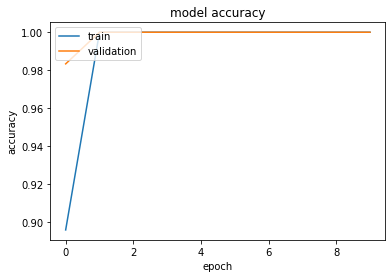

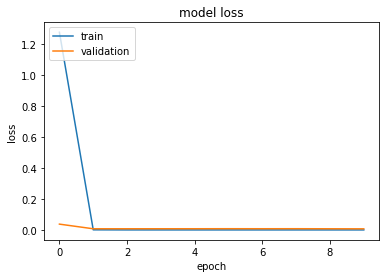

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



---



---


This for try out your image

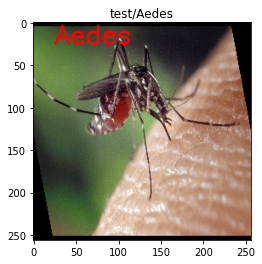

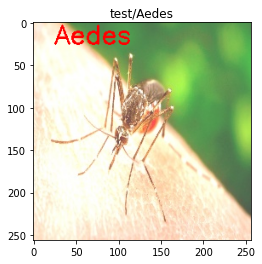

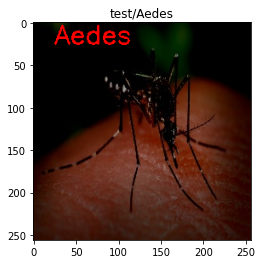

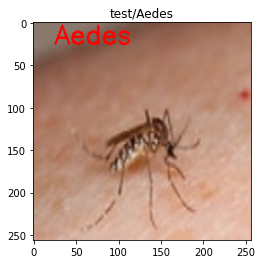

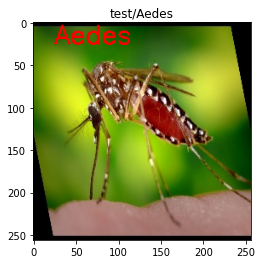

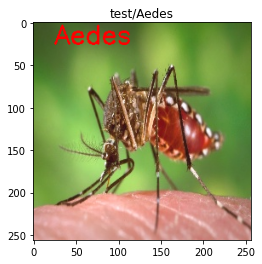

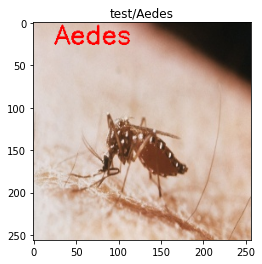

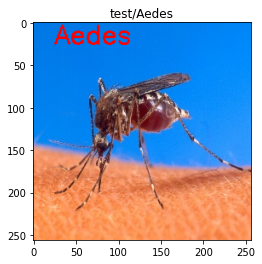

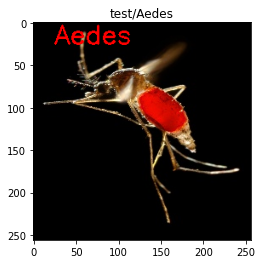

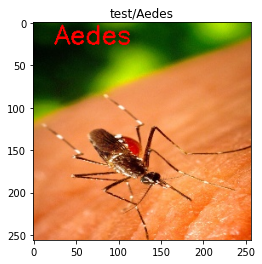

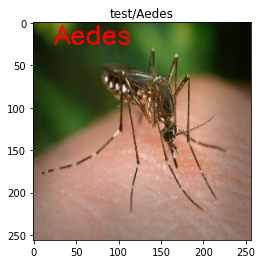

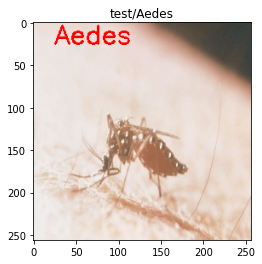

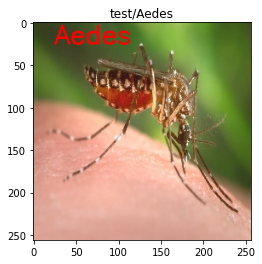

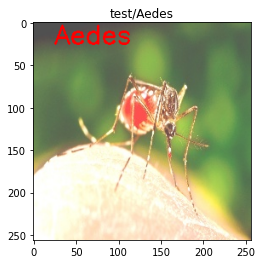

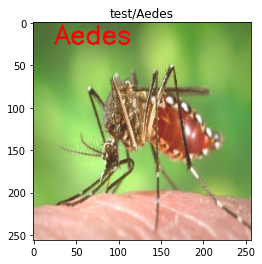

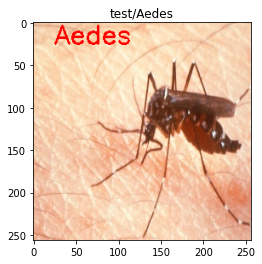

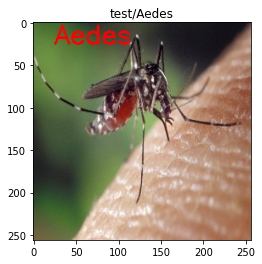

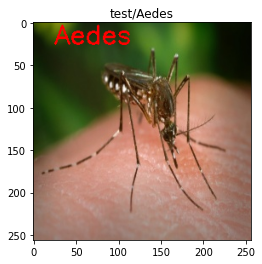

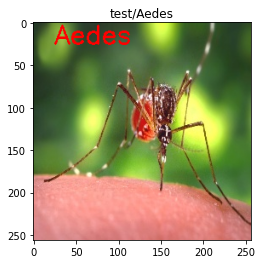

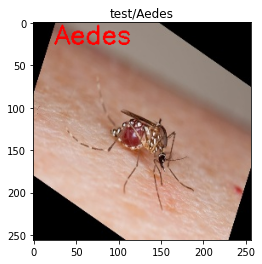

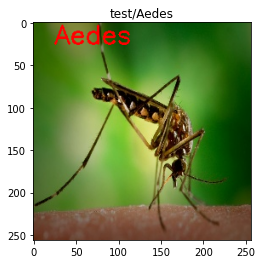

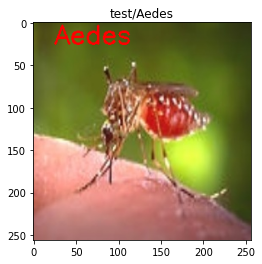

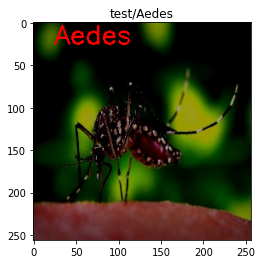

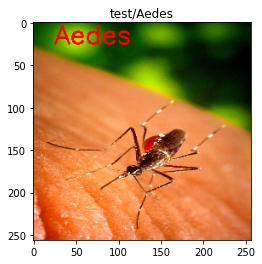

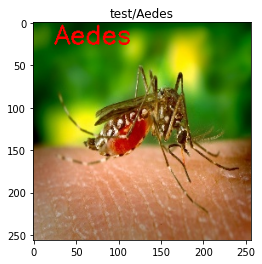

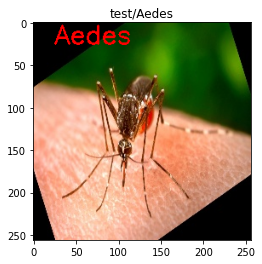

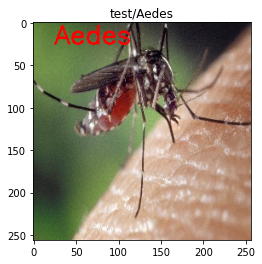

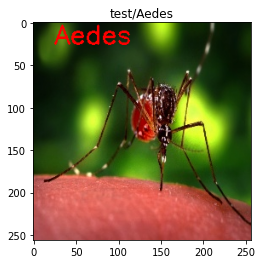

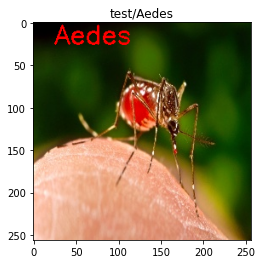

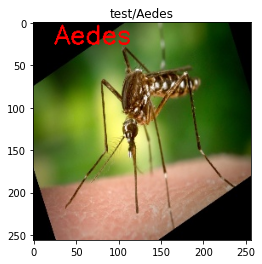

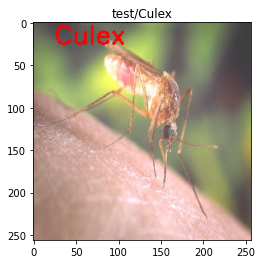

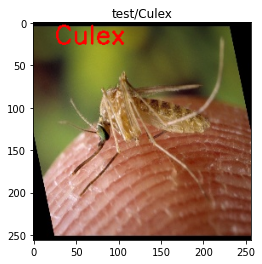

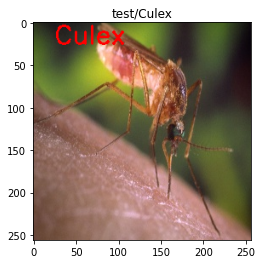

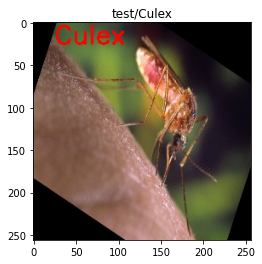

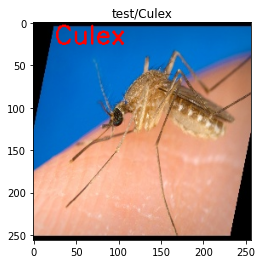

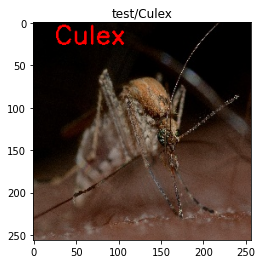

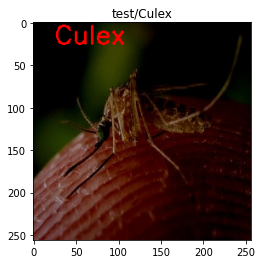

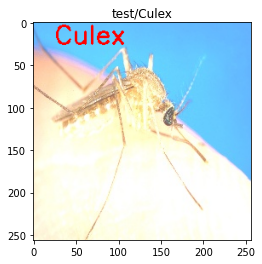

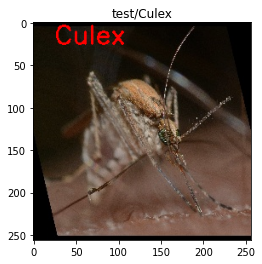

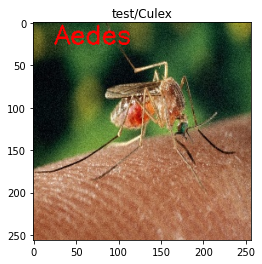

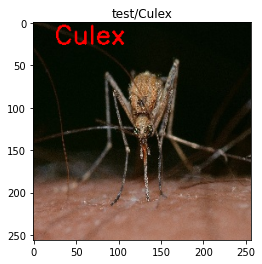

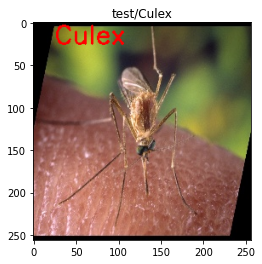

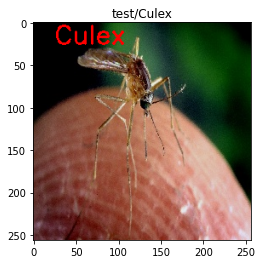

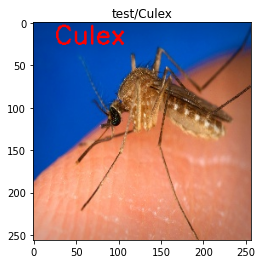

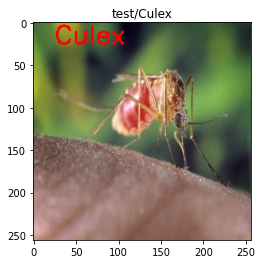

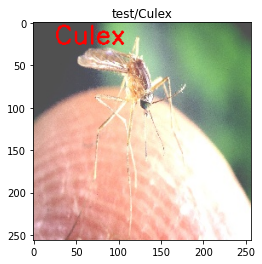

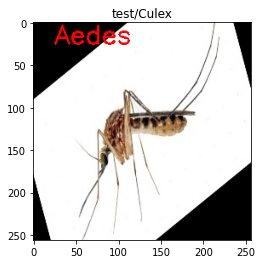

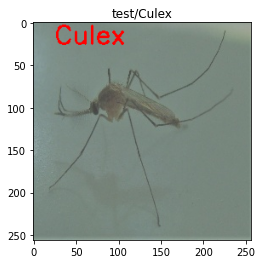

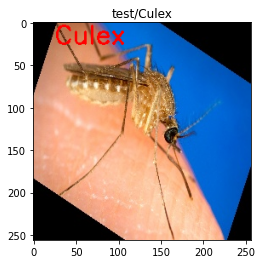

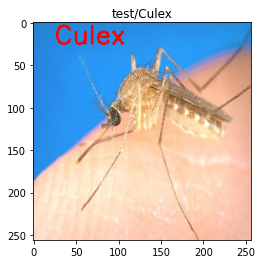

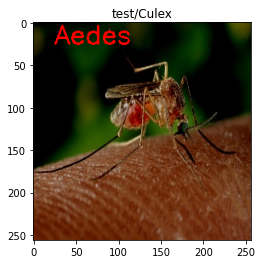

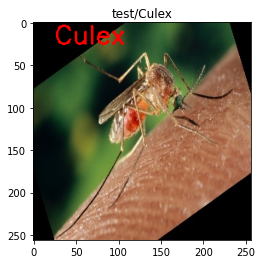

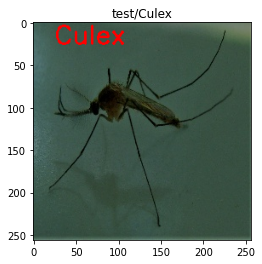

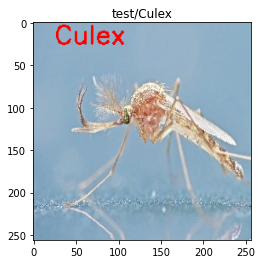

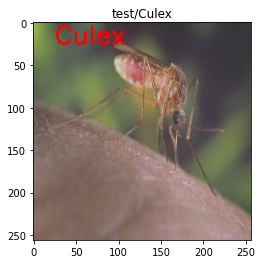

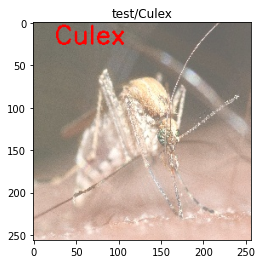

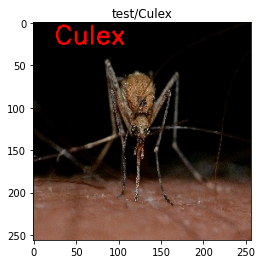

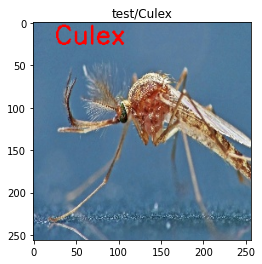

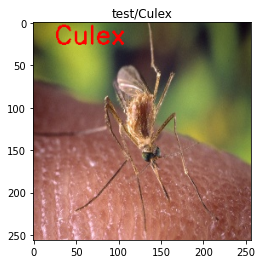

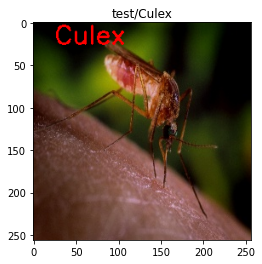

In [ ]:
testpath = 'test/'
testImg = [testpath+f for f in listdir(testpath) if listdir(join(testpath, f))]
rimg = []
for imagePath in (testImg):
    for item in (os.listdir(imagePath)):
        file = os.path.join(imagePath, item)
        if item.split('.')[0] != "":

          img = cv2.imread(file , cv2.COLOR_BGR2RGB)
          ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
          predict = model.predict(rimg)
          label = ['Aedes','Culex']
          result = label[np.argmax(predict)]
          print(predict)
          print('real:'+str(item))
          print('predict:'+str(result))
          plt.imshow(ori)
          plt.show()

